## PROJECT 2

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [353]:
df=pd.read_csv('crypto-markets.csv')

In [354]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

In [355]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942297 entries, 2013-04-28 to 2018-11-30
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         942297 non-null  object        
 1   symbol       942297 non-null  object        
 2   name         942297 non-null  object        
 3   date         942297 non-null  datetime64[ns]
 4   ranknow      942297 non-null  int64         
 5   open         942297 non-null  float64       
 6   high         942297 non-null  float64       
 7   low          942297 non-null  float64       
 8   close        942297 non-null  float64       
 9   volume       942297 non-null  float64       
 10  market       942297 non-null  float64       
 11  close_ratio  942297 non-null  float64       
 12  spread       942297 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 100.6+ MB


In [357]:
#df.drop(['', 'C'], axis=1)


In [358]:
# Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [359]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [360]:
#for printing the latest updated values

print("Latest data:")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head(7)

Latest data:


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,,
2018-11-30,42-coin,42,42-coin,2018-11-30,1228,23272.24,25082.69,21436.75,22665.93,308.0,951968.0,0.3371,3645.94
2018-11-30,bit20,BTWTY,Bit20,2018-11-30,1505,59697.89,59697.89,58616.07,59274.96,0.0,60223.0,0.6091,1081.82
2018-11-30,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [361]:
#Number of crypto currencies listed:
df['symbol'].nunique()

2005

In [362]:
#To find NaN values
df.isna().any()

slug           False
symbol         False
name           False
date           False
ranknow        False
open           False
high           False
low            False
close          False
volume         False
market         False
close_ratio    False
spread         False
dtype: bool

In [363]:
df.keys()

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [364]:
c=df[['close']]
c.head(6)


,close
date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75


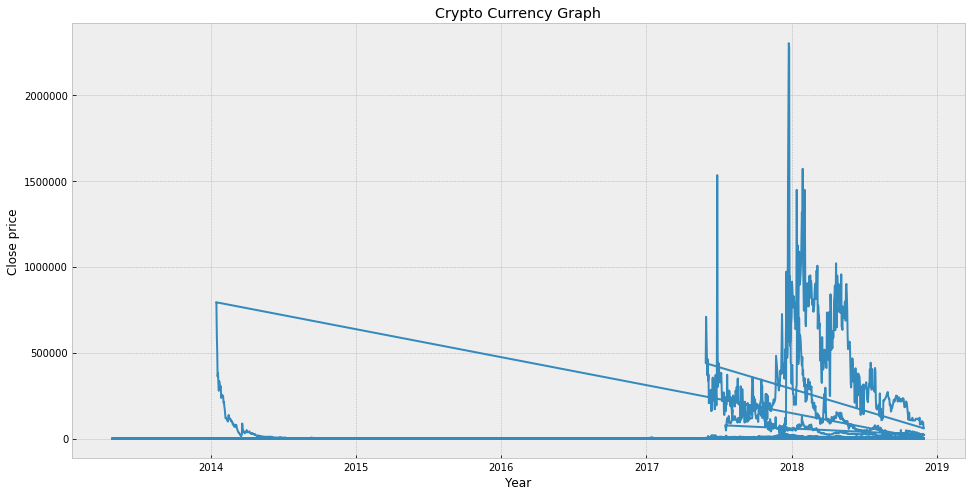

In [365]:
plt.figure(figsize=(16,8))
plt.title('Crypto Currency Graph')
plt.xlabel('Year')
plt.ylabel('Close price')
plt.plot(df['close'])
plt.show()

In [366]:
x=df.iloc[:,5:6]   #open column data
y=df.close        #close column data

In [367]:
x.values

array([[  135.3 ],
       [  134.44],
       [  144.  ],
       ...,
       [23320.9 ],
       [24543.53],
       [22872.09]])

In [368]:
x=df.iloc[:,5:6].values  #x in 2d array ,since x is independent
y=df.iloc[:,8].values    #y in 1d array


In [369]:
model=LinearRegression()

In [370]:
model.fit(x,y)

LinearRegression()

In [371]:
m=model.coef_
c=model.intercept_

In [372]:
y_predict=(m*x)+c

In [373]:
y_predict

array([[  143.50509397],
       [  142.68729849],
       [  151.77814126],
       ...,
       [22191.27122002],
       [23353.90062356],
       [21764.48658149]])

In [374]:
y

array([  134.21,   144.54,   139.  , ..., 24442.7 , 22839.44, 21136.72])

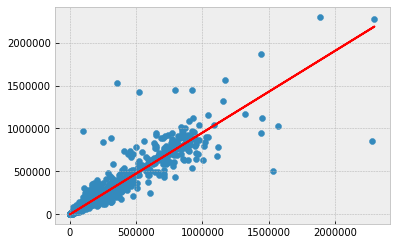

In [375]:
plt.scatter(x,y)
plt.plot(x,y_predict, c="red")
plt.show()

In [376]:
df['CLOSE_2'] = (df['close']-df['open'])>2.1

In [377]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,CLOSE_2
date,,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,False
2013-04-29,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,True
2013-04-30,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,False
2013-05-01,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,False
2013-05-02,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,False


In [378]:

y_predict=y_predict.flatten()
y_predict

array([  143.50509397,   142.68729849,   151.77814126, ...,
       22191.27122002, 23353.90062356, 21764.48658149])

In [389]:
err=abs(y_predict-y) 

In [391]:
df['Error']=err

In [393]:
accuracy=(err/y)*100
accuracy

array([6.92578345, 1.28179155, 9.19290738, ..., 9.2110478 , 2.2525098 ,
       2.97002837])

In [394]:
y

array([  134.21,   144.54,   139.  , ..., 24442.7 , 22839.44, 21136.72])